In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Eczema Photos/stasis-dermatitis-9.jpg  
  inflating: train/Eczema Photos/stasis-dermatitis-90.jpg  
  inflating: train/Eczema Photos/stasis-dermatitis-95.jpg  
  inflating: train/Eczema Photos/stasis-dermatitis-99.jpg  
   creating: train/Hair Loss Alopecia/
  inflating: train/Hair Loss Alopecia/acne-keloidalis-1.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-10.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-11.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-12.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-13.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-16.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-19.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-2.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-21.jpg  
  inflating: train/Hair Loss Alopecia/acne-keloidalis-22.jpg  
  inflating: train/Hair Loss Alopecia/acne-

In [3]:
#Importing Required Libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from random import shuffle

In [4]:
#Data Loading and Data Cleaning
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=110

In [5]:
#Loading data
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 8703 files belonging to 10 classes.


In [6]:
#Displaying classes in the dataset
class_names = dataset.class_names
class_names

['Acne and Rosacea',
 'Actinic Keratosis',
 'Atopic Dermatitis',
 'Eczema Photos',
 'Hair Loss Alopecia',
 'Melanoma Skin Cancer',
 'Psoriasis',
 'Seborrheic Keratoses',
 'Tinea Ringworm',
 'Urticaria Hives']

(32, 256, 256, 3)
[1 8 3 1 3 1 3 8 0 6 1 0 3 6 4 6 6 1 0 3 3 0 5 1 6 6 3 5 0 5 3 6]


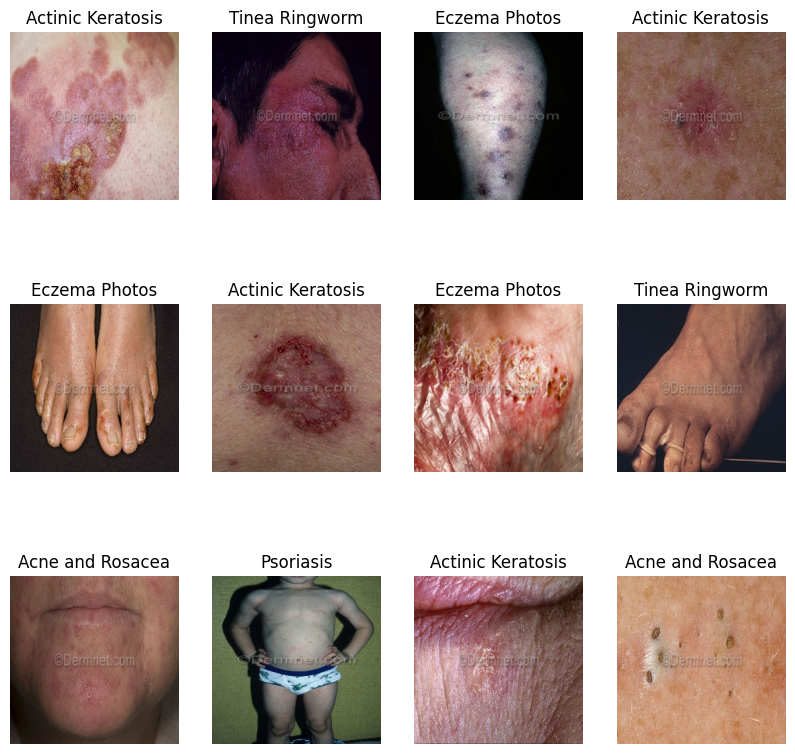

In [7]:
#Exploring Dataset
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12): #Image Visualization
        ax = plt.subplot(3,4,i+1) #Displaying images in matrix form
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [8]:
# 80% ==> Training
# 20% ==> Test (Split this into two parts)
  #  10% ==> Validation
  #  10% ==> Test

In [9]:
train_size = 0.8
len(dataset)*train_size

217.60000000000002

In [10]:
train_ds = dataset.take(217)
len(train_ds)

217

In [11]:
test_ds = dataset.skip(217)
len(test_ds)

55

In [12]:
val_size=0.1
len(dataset)*val_size

27.200000000000003

In [13]:
val_ds = test_ds.take(27)
len(val_ds)

27

In [14]:
test_ds = test_ds.skip(27)
len(test_ds)

28

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+test_split+val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

217

In [18]:
len(val_ds)

27

In [19]:
len(test_ds)

28

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.75774354 0.62048864 0.45578277]
  [0.7574487  0.6201938  0.4554879 ]
  [0.77475107 0.62573147 0.4727903 ]
  ...
  [0.8754864  0.9107805  0.89117265]
  [0.86831343 0.9075291  0.87615657]
  [0.86169195 0.90090764 0.8695351 ]]

 [[0.7585784  0.62414217 0.47291666]
  [0.7657667  0.6285118  0.4772863 ]
  [0.7845244  0.6472694  0.49604395]
  ...
  [0.8750996  0.9103937  0.8907859 ]
  [0.878305   0.9175207  0.88614815]
  [0.88385034 0.923066   0.8916935 ]]

 [[0.7836971  0.6503638  0.5052658 ]
  [0.7871209  0.65378755 0.50868946]
  [0.79826516 0.6570887  0.51591223]
  ...
  [0.8833142  0.9186083  0.89900047]
  [0.87830883 0.91360295 0.8939951 ]
  [0.8768382  0.91605395 0.88468134]]

 ...

 [[0.23566942 0.1886106  0.10233609]
  [0.2509574  0.2038986  0.11593137]
  [0.26280254 0.21574372 0.12162607]
  ...
  [0.74574906 0.7888863  0.79672945]
  [0.72868794 0.7718252  0.77966833]
  [0.7078163  0.75095356 0.75879675]]

 [[0.23406863 0.18308823 0.10857843]
  [0.23782936 0.18966758 0.1067019 ]


In [22]:
#Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [23]:
#Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
]
)

In [24]:
#Building and training CNN Model
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes= 10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation, 
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  
])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)  

Epoch 1/110
217/217 [==============================] - 58s 88ms/step - loss: 2.1576 - accuracy: 0.1725 - val_loss: 2.0895 - val_accuracy: 0.2302
Epoch 2/110
217/217 [==============================] - 16s 75ms/step - loss: 2.0546 - accuracy: 0.2306 - val_loss: 2.0240 - val_accuracy: 0.2467
Epoch 3/110
217/217 [==============================] - 16s 76ms/step - loss: 2.0072 - accuracy: 0.2473 - val_loss: 1.9658 - val_accuracy: 0.2662
Epoch 4/110
217/217 [==============================] - 17s 76ms/step - loss: 1.9700 - accuracy: 0.2701 - val_loss: 1.9746 - val_accuracy: 0.2686
Epoch 5/110
217/217 [==============================] - 17s 76ms/step - loss: 1.9543 - accuracy: 0.2706 - val_loss: 1.9237 - val_accuracy: 0.2809
Epoch 6/110
217/217 [==============================] - 16s 76ms/step - loss: 1.9344 - accuracy: 0.2786 - val_loss: 1.8986 - val_accuracy: 0.3010
Epoch 7/110
217/217 [==============================] - 17s 76ms/step - loss: 1.9097 - accuracy: 0.2771 - val_loss: 1.8770 - val_ac